# 무선청소기 모델별 비교 분석

In [4]:
import pandas as pd 

danawa_data = pd.read_excel('./files/danawa_data_final.xlsx')
danawa_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    400 non-null    object 
 1   회사명     400 non-null    object 
 2   제품      400 non-null    object 
 3   가격      420 non-null    int64  
 4   사용시간    370 non-null    float64
 5   흡입력     263 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.8+ KB


In [5]:
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9884,915590,60.0,250.0
1,핸디스틱청소기,샤오미,미홀 M22,154000,NaN,NaN
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9 AU9202WD,523690,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,475210,60.0,220.0
4,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9988,1319870,60.0,280.0


In [6]:
# 흡입력 기준 정렬
top_list = danawa_data.sort_values(['흡입력'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
84,핸디스틱청소기,아이룸,윈드포스 F9,189000,40.0,420.0
258,핸디스틱청소기,비브르,V38 스페셜 에디션,195000,50.0,410.0
28,핸디스틱청소기,DIBEA,ALLNEW29000 PLUS,224100,50.0,400.0
290,핸디스틱청소기,DIBEA,THE NEW,189000,50.0,390.0
81,핸디스틱청소기,DIBEA,ALLNEW22000+ (24년형),179000,50.0,390.0


In [7]:
# 사용시간 기준 정렬
top_list = danawa_data.sort_values(['사용시간'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
224,욕실청소기,한샘,트리플 플러스 2.0 QNBC-6000W,78800,240.0,NaN
223,욕실청소기,캐치웰,CM6+,39900,150.0,NaN
321,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 라이트 EFP71523 + 익스플로어7 컴팩트 블렌더 E7CB1-53CW,729000,120.0,NaN
280,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 라이트 EFP71523,729000,120.0,NaN
210,욕실청소기,마이리빙,이지러빙 SNAPP-BC-01,74900,100.0,NaN


In [8]:
# 흡입력 & 사용시간 Top리스트
top_list = danawa_data.sort_values(['사용시간','흡입력'],ascending= False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
224,욕실청소기,한샘,트리플 플러스 2.0 QNBC-6000W,78800,240.0,NaN
223,욕실청소기,캐치웰,CM6+,39900,150.0,NaN
280,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 라이트 EFP71523,729000,120.0,NaN
321,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 라이트 EFP71523 + 익스플로어7 컴팩트 블렌더 E7CB1-53CW,729000,120.0,NaN
108,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973IS,1340550,100.0,280.0


* 가성비가 좋은 제품 파악
    * 가격대비 성능이 우수
    * 모델의 가격, 흡입력, 사용시간의 평균값을 비교

In [9]:
# 전체 모델의 가격/ 흡입력/ 사용시간 평균값을 구함

price_mean_value =danawa_data['가격'].mean()
suction_mean_value =danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()

print('가격 평균값',price_mean_value)
print('흡입력 평균값',suction_mean_value)
print('사용시간 평균값',use_time_mean_value)

가격 평균값 399135.9761904762
흡입력 평균값 185.86692015209127
사용시간 평균값 46.167567567567566


In [10]:
# 가성비 좋은 제품 탐색

condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value)&
     (danawa_data['흡입력'] >= suction_mean_value)&
     (danawa_data['사용시간'] >= use_time_mean_value)
]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
16,핸디스틱청소기,아이닉,NEW i20 (23년형),198000,50.0,350.0
18,핸디스틱청소기,드리미,V11,181360,90.0,250.0
28,핸디스틱청소기,DIBEA,ALLNEW29000 PLUS,224100,50.0,400.0
32,핸디스틱청소기,아이닉,i30 아이타워,297990,50.0,350.0
35,핸디스틱청소기,드리미,V10,149780,60.0,220.0
55,핸디스틱청소기,샤오미,G10,207470,65.0,250.0
81,핸디스틱청소기,DIBEA,ALLNEW22000+ (24년형),179000,50.0,390.0
105,핸디스틱청소기,JONR,VC10,160000,60.0,270.0
120,핸디스틱청소기,아이닉,NEW i20 (21년형),199000,50.0,300.0
121,핸디스틱청소기,샤오미,COCLEAN V30,115570,60.0,250.0


* 시각화

In [11]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt 
import seaborn as sns
import platform

font_path = ''

if platform.system() == 'Windows':
    font_path = 'C:\Windows\Fonts\H2GTRE.TTF'
    font_name = font_manager.FontProperties(fname= font_path).get_name()
    rc('font',family=font_name)
    
else:
    print('Check your OS system')

* 결측값 제거 : 가격, 사용시간, 흡입력 

In [12]:
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

253

In [13]:
# 흡입력: x, 사용시간: y
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

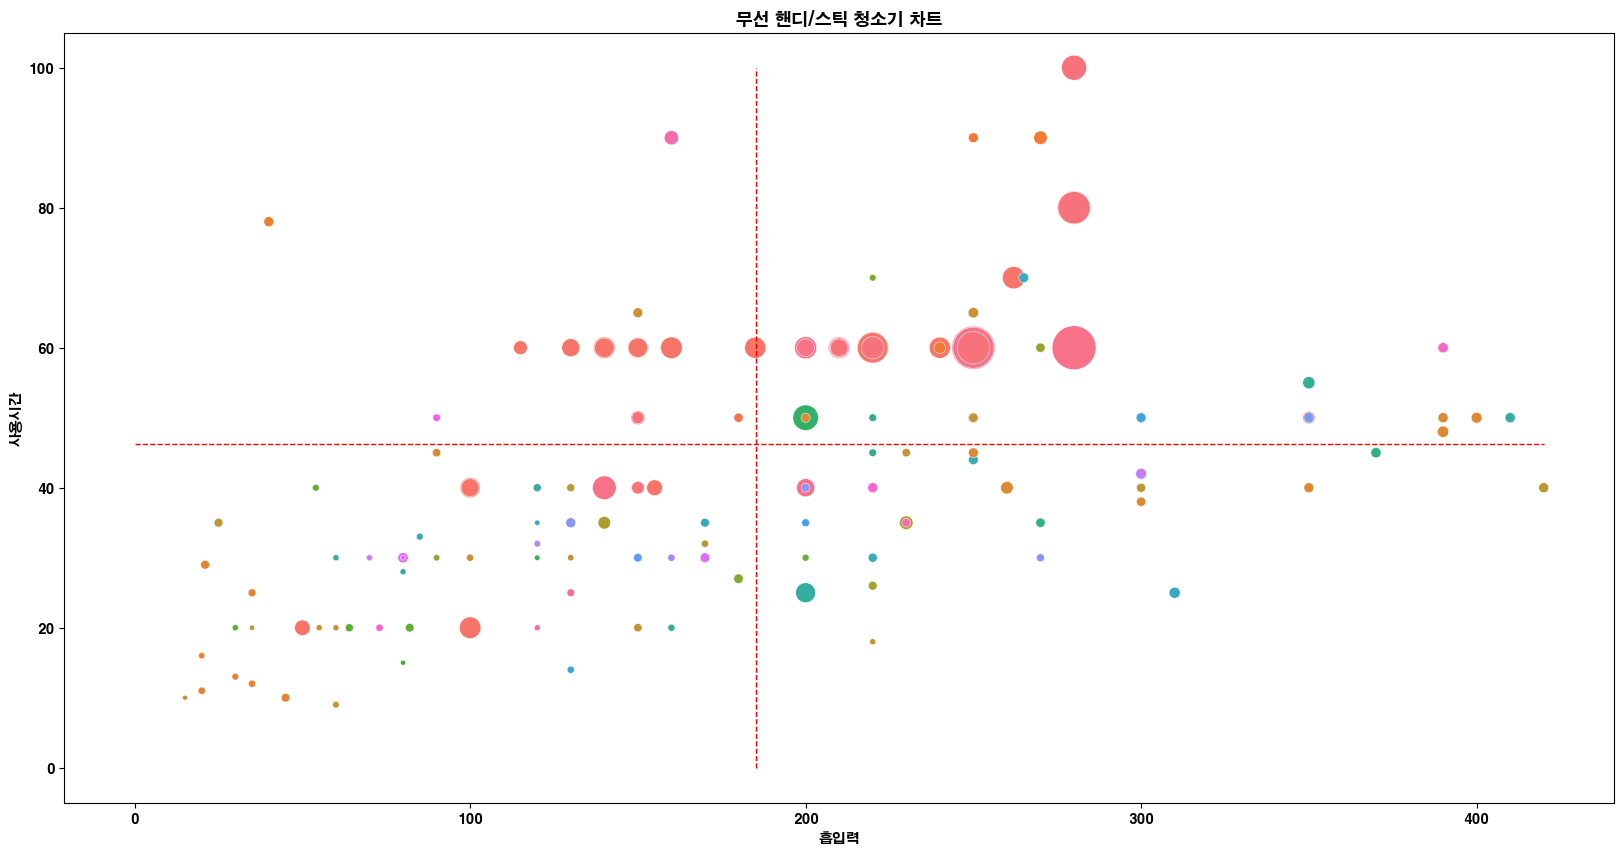

In [14]:
# 청소기 성능 시각화
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱 청소기 차트')
sns.scatterplot(x='흡입력', y='사용시간', size = '가격', hue= chart_data['회사명'],
                data= chart_data, sizes = (10,1000), legend= False)


plt.plot([0,suction_max_value],
         [use_time_mean_value,use_time_mean_value],
         'r--',
         lw=1)

plt.plot([suction_mean_value, suction_mean_value],
         [0,use_time_max_value],
         'r--',
         lw=1)

plt.show()

* 인기 제품의 데이터 시각화

In [15]:
# 인기 제품 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [16]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

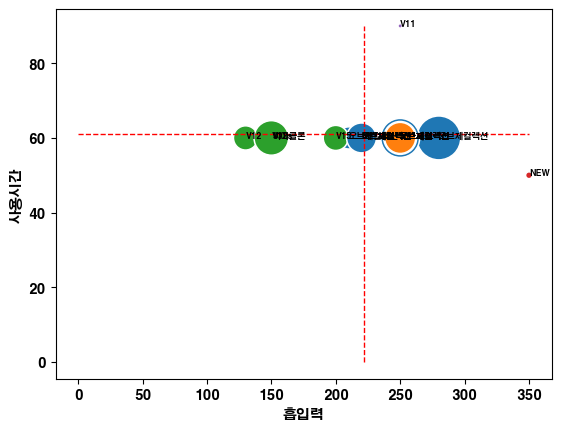

In [18]:
sns.scatterplot(x='흡입력',
                y='사용시간',
                size = '가격',
                hue= chart_data_selected['회사명'],
                data= chart_data_selected, sizes = (10,1000), legend= False)


plt.plot([0,suction_max_value],
         [use_time_mean_value,use_time_mean_value],
         'r--',
         lw=1)

plt.plot([suction_mean_value, suction_mean_value],
         [0,use_time_max_value],
         'r--',
         lw=1)

# 회사명 찍기
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s, size=6)

plt.show()